# Normalization
**Normalization is a preprocessing technique used in data processing and machine learning to scale input data to a specific range or distribution, making it easier for models to learn effectively.**

#### Purpose of Normalization
1. **Improved Convergence:** Helps gradient-based optimization methods converge faster by making the cost surface smoother.
2. **Equal Contribution:** Ensures that all features contribute equally to the model's learning process, preventing dominance by features with larger scales.
3. **Stable Training:** Reduces the risk of exploding or vanishing gradients, especially in deep networks.

## Common Normalization Techniques
**Min-Max Scaling:**
Definition: Scales features to a fixed range, usually [0, 1] or [-1, 1].

**Z-Score Normalization (Standardization):**
Definition: Centers the data to have a mean of 0 and a standard deviation of 1.

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

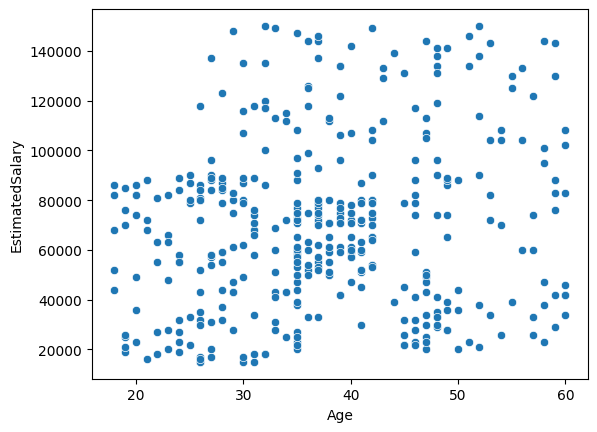

In [7]:
sns.scatterplot(x=df.iloc[:,0],y=df.iloc[:,1])

In [8]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 26ms/step - loss: 536.9132 - accuracy: 0.4531 - val_loss: 125.9756 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 95.2087 - accuracy: 0.5250 - val_loss: 124.1123 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 127.5015 - accuracy: 0.4875 - val_loss: 175.0470 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 158.3474 - accuracy: 0.5469 - val_loss: 69.5374 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 84.5389 - accuracy: 0.5719 - val_loss: 10.6960 - val_accuracy: 0.6250
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 22.2313 - accuracy: 0.5375 - val_loss: 84.2488 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 27.1735 - accuracy: 0.5594 - val_loss: 11.4199 - val_accuracy:

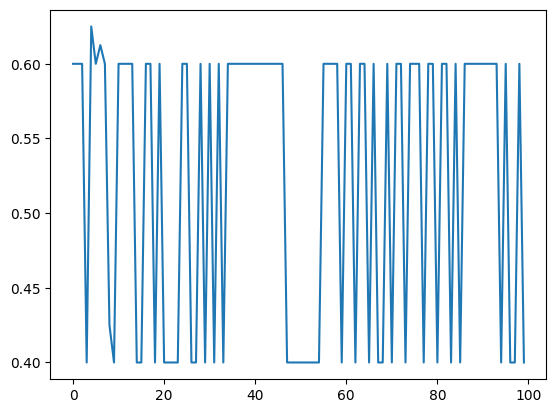

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

# Applying scaling

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

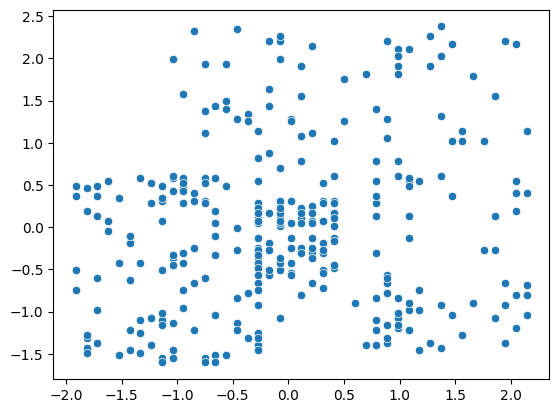

In [20]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

### We can see by both the graph distribution before and after scaling is same

In [21]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 0.7140 - accuracy: 0.5906 - val_loss: 0.6895 - val_accuracy: 0.6000
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6544 - accuracy: 0.6469 - val_loss: 0.6297 - val_accuracy: 0.7125
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6041 - accuracy: 0.7500 - val_loss: 0.5774 - val_accuracy: 0.7625
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.5597 - accuracy: 0.7937 - val_loss: 0.5320 - val_accuracy: 0.7750
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5208 - accuracy: 0.8062 - val_loss: 0.4936 - val_accuracy: 0.7750
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4877 - accuracy: 0.8094 - val_loss: 0.4597 - val_accuracy: 0.7750
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4574 - accuracy: 0.8219 - val_loss: 0.4316 - val_accuracy: 0.7875
Epoch 8/100


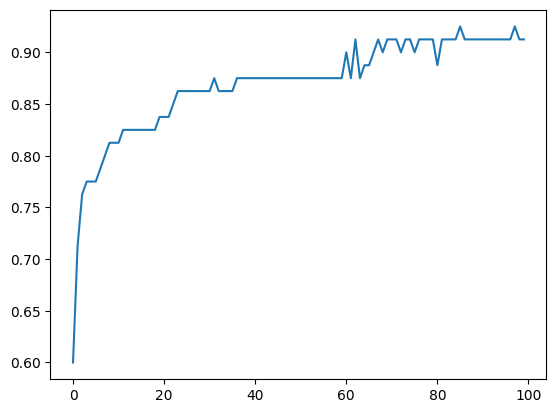

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

### Here we can see that validation accuracy is improving